In [1]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import matplotlib.pyplot as plt
from mmdew.fast_rbf_kernel import est_gamma
from mmdew.mmdew import MMDEW
from tqdm import tqdm

In [2]:
rng = np.random.default_rng()

In [3]:
d=20

In [59]:
ref_size=1000
reps=25
target_arl=25000

In [60]:
statistics = []

for _ in tqdm(range(reps)):
    ref = rng.normal(size=(ref_size,d))
    gamma = est_gamma(ref)
    detector = MMDEW(gamma=gamma)
    
    data = rng.normal(size=(target_arl*10,d))
    
    for elem in data:
        detector.insert(elem.reshape(1,-1))
    statistics += detector.stats[64:] # the first few have large variance

100%|████████████████████████████████████████| 25/25 [2:57:26<00:00, 425.84s/it]


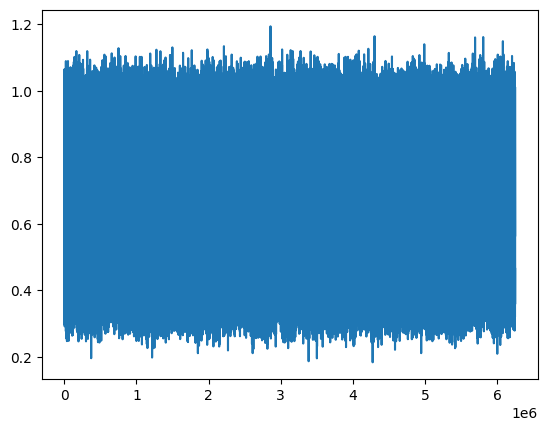

In [61]:
plt.plot(statistics)

In [62]:
np.std(statistics)

np.float64(0.11409939373247)

In [63]:
np.std(statistics)

np.float64(0.11409939373247)

In [64]:
import pickle

In [65]:
with open('mmdew-statistics.pickle', 'wb') as handle:
    pickle.dump(statistics, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
with open('mmdew-statistics.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [67]:
threshold = np.quantile(statistics, 1-(1/target_arl))

In [68]:
threshold

np.float64(1.0721815770388703)

In [69]:
np.sum(detector.stats > threshold) # arl

np.int64(12)

In [70]:
threshold #somewhat lower than the one given in their article's Figure 3 but we also have lower values of the test statistic for Figure 1. Might be due to a slight difference in the median heuristic.

np.float64(1.0721815770388703)

In [71]:
target_arls_log = np.arange(3,5.1,.25)

arl2thresh = { i : np.quantile(statistics, 1-(1/10**i)) for i in target_arls_log}

# q = N(0,2^2) or N(0,1)

In [54]:
h1_stats = []

for _ in tqdm(range(100)):
    ref = rng.normal(size=(10000,d))
    gamma = est_gamma(ref)
    detector = MMDEW(gamma=gamma)
    for elem in ref[:64]:
        detector.insert(elem.reshape(1,-1))

    q = np.where((rng.uniform(size=500)>0.9).reshape(-1,1), rng.normal(scale=2,size=(500,d)), rng.normal(size=(500,d)))

    for elem in q:
        detector.insert(elem.reshape(1,-1))
    h1_stats += [detector.stats[64:]]

100%|█████████████████████████████████████████| 100/100 [01:39<00:00,  1.01it/s]


In [55]:
arl2edd = {}
for arl, thresh in arl2thresh.items():
    edd = [np.argmax(s>thresh) for s in h1_stats]
    arl2edd[arl] = np.mean(edd)

In [56]:
arl2edd

{np.float64(3.0): np.float64(10.33),
 np.float64(3.25): np.float64(10.48),
 np.float64(3.5): np.float64(10.48),
 np.float64(3.75): np.float64(10.56),
 np.float64(4.0): np.float64(10.65),
 np.float64(4.25): np.float64(10.65),
 np.float64(4.5): np.float64(10.71),
 np.float64(4.75): np.float64(10.87),
 np.float64(5.0): np.float64(10.87)}

# q = Laplace

In [34]:
h1_stats = []

for _ in tqdm(range(100)):
    ref = rng.normal(size=(10000,d))
    gamma = est_gamma(ref)
    detector = MMDEW(gamma=gamma)
    for elem in ref[:64]:
        detector.insert(elem.reshape(1,-1))

    q = rng.laplace(scale=np.sqrt(2),size=(50,d))

    for elem in q:
        detector.insert(elem.reshape(1,-1))
    h1_stats += [detector.stats[64:]]

100%|█████████████████████████████████████████| 100/100 [01:05<00:00,  1.52it/s]


In [35]:
arl2edd = {}
for arl, thresh in arl2thresh.items():
    edd = [np.argmax(s>thresh) for s in h1_stats]
    arl2edd[arl] = np.mean(edd)

In [36]:
arl2edd

{np.float64(3.0): np.float64(0.22),
 np.float64(3.25): np.float64(0.23),
 np.float64(3.5): np.float64(0.26),
 np.float64(3.75): np.float64(0.3),
 np.float64(4.0): np.float64(0.36),
 np.float64(4.25): np.float64(0.42),
 np.float64(4.5): np.float64(0.42),
 np.float64(4.75): np.float64(0.47),
 np.float64(5.0): np.float64(0.47)}

# q = Uniform

In [41]:
h1_stats = []

for _ in tqdm(range(100)):
    ref = rng.normal(size=(10000,d))
    gamma = est_gamma(ref)
    detector = MMDEW(gamma=gamma)
    for elem in ref[:64]:
        detector.insert(elem.reshape(1,-1))

    q = rng.uniform(-1,1,size=(50,d))*np.sqrt(2)

    for elem in q:
        detector.insert(elem.reshape(1,-1))
    h1_stats += [detector.stats[64:]]

100%|█████████████████████████████████████████| 100/100 [01:05<00:00,  1.52it/s]


In [42]:
arl2edd = {}
for arl, thresh in arl2thresh.items():
    edd = [np.argmax(s>thresh) for s in h1_stats]
    arl2edd[arl] = np.mean(edd)

In [43]:
arl2edd

{np.float64(3.0): np.float64(0.0),
 np.float64(3.25): np.float64(0.0),
 np.float64(3.5): np.float64(0.0),
 np.float64(3.75): np.float64(0.0),
 np.float64(4.0): np.float64(0.0),
 np.float64(4.25): np.float64(0.0),
 np.float64(4.5): np.float64(0.0),
 np.float64(4.75): np.float64(0.0),
 np.float64(5.0): np.float64(0.0)}

# q = p

In [77]:
h1_stats = []

for _ in tqdm(range(100)):
    ref = rng.normal(size=(10000,d))
    gamma = est_gamma(ref)
    detector = MMDEW(gamma=gamma)

    q = rng.normal(size=(50000,d))

    for elem in ref[:64]:
        detector.insert(elem.reshape(1,-1))

    for elem in q:
        detector.insert(elem.reshape(1,-1))
    h1_stats += [detector.stats[64:]]

100%|███████████████████████████████████████| 100/100 [2:03:03<00:00, 73.83s/it]


In [82]:
arl2edd = {}
for arl, thresh in arl2thresh.items():
    edd = [np.argmax(s + [np.inf]>thresh) for s in h1_stats]
    arl2edd[arl] = np.mean(edd)

In [83]:
arl2edd

{np.float64(3.0): np.float64(414.03),
 np.float64(3.25): np.float64(931.76),
 np.float64(3.5): np.float64(2015.29),
 np.float64(3.75): np.float64(3830.94),
 np.float64(4.0): np.float64(7430.41),
 np.float64(4.25): np.float64(13616.92),
 np.float64(4.5): np.float64(20712.46),
 np.float64(4.75): np.float64(28514.02),
 np.float64(5.0): np.float64(36807.7)}